#Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Data Extraction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
data = pd.read_csv("/content/drive/MyDrive/Parkinsson disease.csv", encoding= 'unicode_escape')

In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.describe(include="all")

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S01_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980


#### <u>As we can see from the summary above, there are differences in the scale between the features. Normalizing the data will be a part of the Pre-Processing pipeline.

In [7]:
#Checking for missing and duplicated data
print("missing_data =",data.isnull().sum().max())
print("duplicated_data =",data.duplicated().sum())

missing_data = 0
duplicated_data = 0


#### -Jitter and shimmer are acoustic characteristics of voice signals, and they are caused by irregular vocal fold vibration. They are perceived as roughness, breathiness, or hoarseness in a speaker's voice

In [8]:
#renaming variables for simpler observing
data.rename(columns=({'MDVP:Fo(Hz)':'avg_freq', 'MDVP:Fhi(Hz)':'max_freq', 'MDVP:Flo(Hz)':'min_freq', 'MDVP:Jitter(%)':'var_freq1',
       'MDVP:Jitter(Abs)':'var_freq2', 'MDVP:RAP':'var_freq3', 'MDVP:PPQ':'var_freq4', 'Jitter:DDP':'var_freq5',
       'MDVP:Shimmer':'var_amp1', 'MDVP:Shimmer(dB)':'var_amp2', 'Shimmer:APQ3':'var_amp3', 'Shimmer:APQ5':'var_amp4',
       'MDVP:APQ':'var_amp5', 'Shimmer:DDA':'var_amp6'}),inplace=True)

In [9]:
data.drop(columns="name",axis=1,inplace=True)
data

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [10]:
#re-ordering the columns
col_names = ['avg_freq',
 'max_freq',
 'min_freq',
 'var_freq1',
 'var_freq2',
 'var_freq3',
 'var_freq4',
 'var_freq5',
 'var_amp1',
 'var_amp2',
 'var_amp3',
 'var_amp4',
 'var_amp5',
 'var_amp6',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE',
 'status']
data = data.reindex(columns=col_names)

In [11]:
data.head()

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


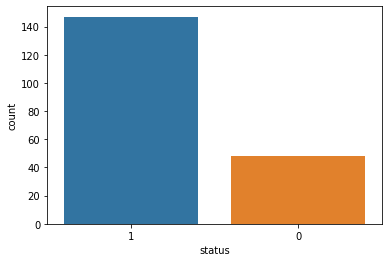

In [12]:
#Visualizing the target column "status"
sns.countplot(x = 'status',
              data = data,
              order = data['status'].value_counts().index)

##### -Since we are dealing with an unbalanced dataset we will be using OverSampling techniques becuase we are dealing with a small dataset, and we can't risk losing alot of information using another technique.
##### <u>-We will come back to this part after the EDA and Preprocessing

In [13]:
def dist_plot(data):
    """Shows distribution plots for the dataframe

        Args:
            data(DataFrame): dataframe of the current data

        Returns:
            Matplotlib axes containing the plot: distribution plots of the dataframe
    """
    grid_size = (10,4)
    fig_size = (12, 20)
    fig = plt.figure(figsize = fig_size)
    column_names = data.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        plot = sns.histplot(data[column_name], kde = True, color = 'Green')
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

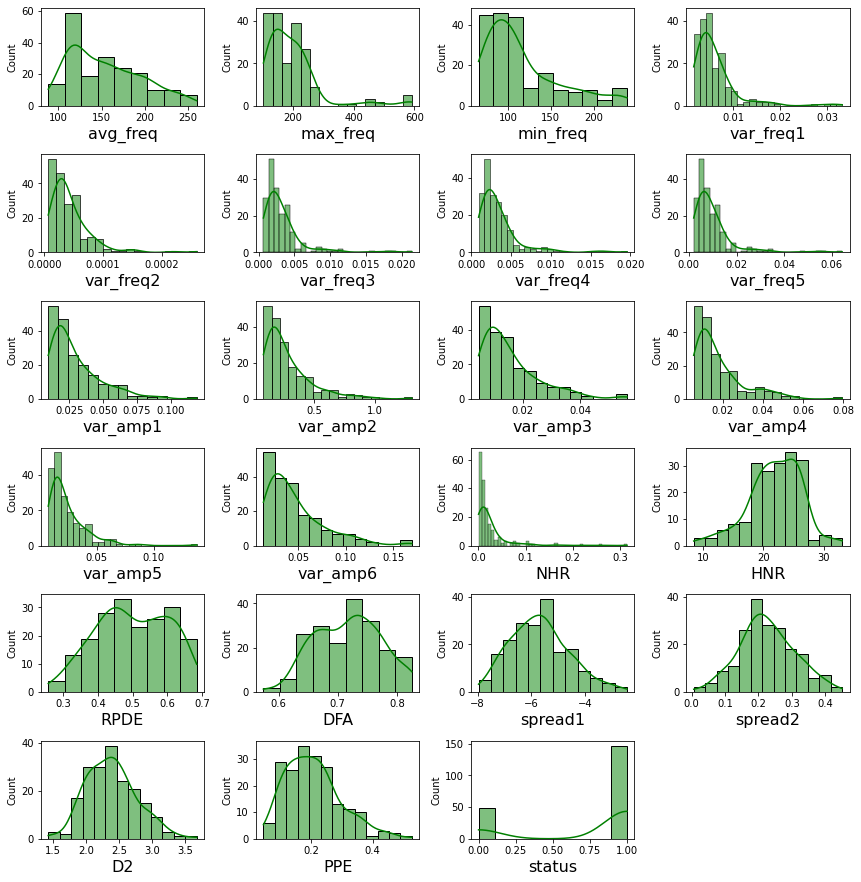

In [14]:
dist_plot(data)

In [15]:
#checking for data skewness
data.skew().sort_values(ascending=False)

NHR          4.220709
var_freq5    3.362058
var_freq3    3.360708
var_freq1    3.084946
var_freq4    3.073892
var_freq2    2.649071
var_amp5     2.618047
max_freq     2.542146
var_amp2     1.999389
var_amp4     1.798697
var_amp1     1.666480
var_amp6     1.580618
var_amp3     1.580576
min_freq     1.217350
PPE          0.797491
avg_freq     0.591737
spread1      0.432139
D2           0.430384
spread2      0.144430
DFA         -0.033214
RPDE        -0.143402
HNR         -0.514317
status      -1.187727
dtype: float64

#### <u> As we can see from the distribution plots and skewness funtion, that we are dealing with alot of skewed data with outliers.

In [16]:
def cor_matrix(data):
    """Creates correlation matrix for the dataframe 

        Args:
            data(DataFrame): dataframe of the current data

        Prints:
            array: columns with high correlation above threshold
            
        Returns:
            DataFrame: correlation matrix
    """
    corr=data.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,annot=True,cmap='OrRd')
    plt.show()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
    print('Columns that have high correlation and should be dropped excluding one of them:',to_drop)
    return corr

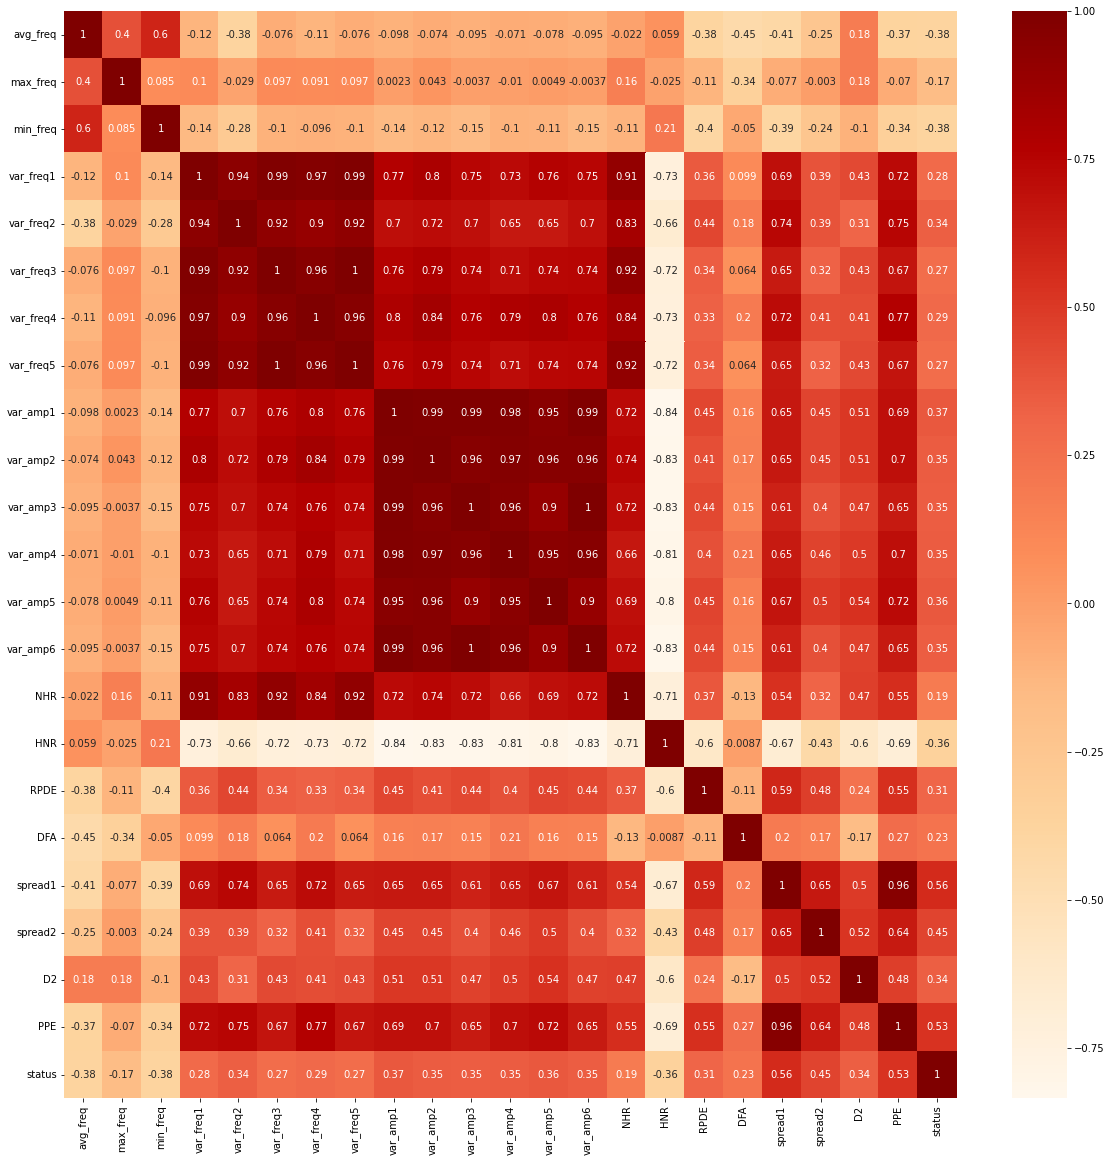

Columns that have high correlation and should be dropped excluding one of them: ['var_freq2', 'var_freq3', 'var_freq4', 'var_freq5', 'var_amp2', 'var_amp3', 'var_amp4', 'var_amp5', 'var_amp6', 'NHR', 'PPE']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [17]:
w = cor_matrix(data)

#### <u> As we can see from the correlation matrix above, the variance variables in amp and freq are highly correlated as said in the description, they are diffirent measurements of the same features.

In [18]:
#printing features most correlated to the target column
status_corr = w.sort_values(by='status', ascending = False).iloc[:,-1]
status_corr

status       1.000000
spread1      0.564838
PPE          0.531039
spread2      0.454842
var_amp1     0.367430
var_amp5     0.364316
var_amp4     0.351148
var_amp2     0.350697
var_amp3     0.347617
var_amp6     0.347608
D2           0.340232
var_freq2    0.338653
RPDE         0.308567
var_freq4    0.288698
var_freq1    0.278220
var_freq3    0.266668
var_freq5    0.266646
DFA          0.231739
NHR          0.189429
max_freq    -0.166136
HNR         -0.361515
min_freq    -0.380200
avg_freq    -0.383535
Name: status, dtype: float64

#### <u> In the output above these are the most effective features in correlation to the status variable

In [19]:
#dropping the highly correlated columns except one
columns_names = ['var_freq2', 'var_freq3', 'var_freq4', 'var_freq5', 'var_amp2', 'var_amp3', 'var_amp4', 'var_amp5', 'var_amp6', 'NHR', 'PPE']
data.drop(columns=columns_names,axis=1,inplace=True)
data

,avg_freq,max_freq,min_freq,var_freq1,var_amp1,HNR,RPDE,DFA,spread1,spread2,D2,status
0,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,1
1,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,1
2,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,1
3,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,1
4,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,1
...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.04087,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0
191,209.516,253.017,89.488,0.00564,0.02751,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0
192,174.688,240.005,74.287,0.01360,0.02308,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0
193,198.764,396.961,74.904,0.00740,0.02296,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0


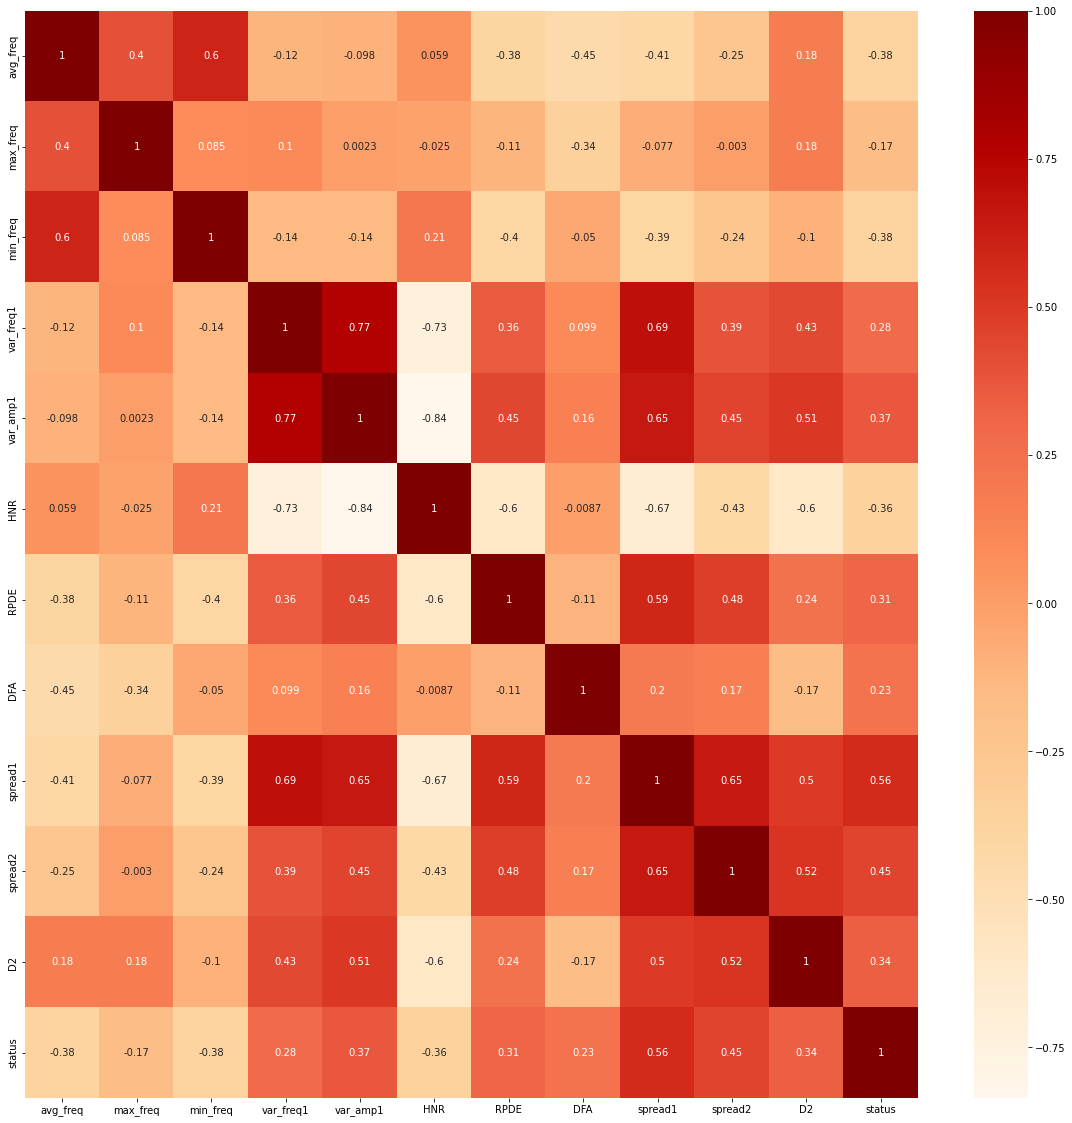

Columns that have high correlation and should be dropped excluding one of them: []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [20]:
#ploting correlation matrix after deleting correlated columns
tmp = cor_matrix(data)

In [21]:
status_corr = tmp.sort_values(by='status', ascending = False).iloc[:,-1]
status_corr

status       1.000000
spread1      0.564838
spread2      0.454842
var_amp1     0.367430
D2           0.340232
RPDE         0.308567
var_freq1    0.278220
DFA          0.231739
max_freq    -0.166136
HNR         -0.361515
min_freq    -0.380200
avg_freq    -0.383535
Name: status, dtype: float64

##### <u> Now that are we done with the correlation part, we start dealing with skewed data and then we will start choosing our baseline,dealing with unbalanced classes, and our optimization.

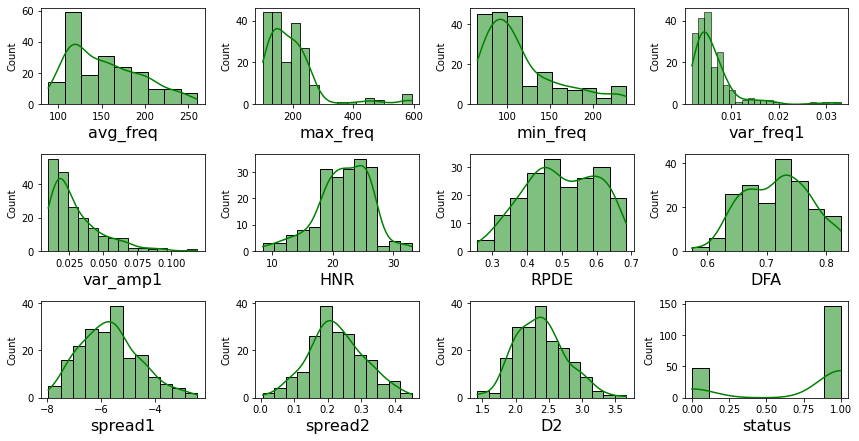

In [22]:
dist_plot(data)

In [23]:
data.skew().sort_values(ascending=False)

var_freq1    3.084946
max_freq     2.542146
var_amp1     1.666480
min_freq     1.217350
avg_freq     0.591737
spread1      0.432139
D2           0.430384
spread2      0.144430
DFA         -0.033214
RPDE        -0.143402
HNR         -0.514317
status      -1.187727
dtype: float64

##### <u> Dealing with outliars

In [24]:
##In this part we start neglecting outliars to reduce the error variance
df = data[data.var_freq1<=0.010]
df2 = df[df.max_freq<=300]
df3 = df2[df2.var_amp1<=0.075]

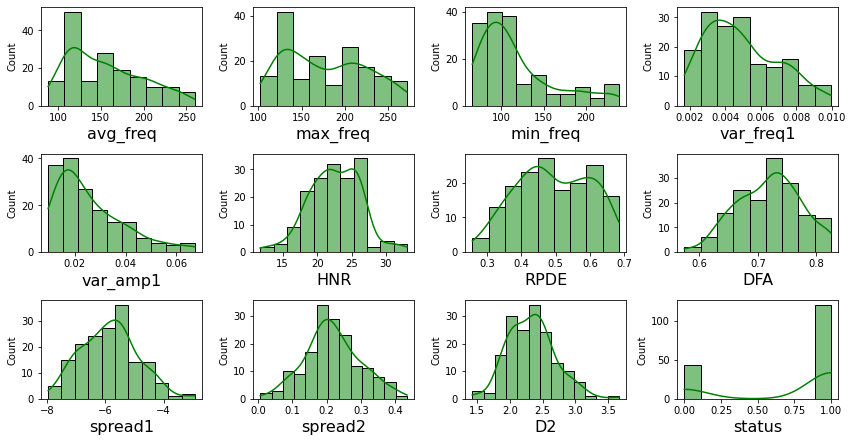

In [25]:
dist_plot(df3)

In [26]:
df3.describe(include='all')

,avg_freq,max_freq,min_freq,var_freq1,var_amp1,HNR,RPDE,DFA,spread1,spread2,D2,status
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,155.055842,177.978091,117.775042,0.004920,0.026118,22.601436,0.492786,0.719339,-5.856604,0.217376,2.331977,0.733333
std,42.996747,47.138671,44.666448,0.002067,0.013560,3.791338,0.107139,0.054320,0.972492,0.080898,0.361769,0.443563
min,88.333000,102.145000,65.476000,0.001680,0.009540,11.744000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.000000
25%,117.226000,132.068000,86.180000,0.003310,0.016080,19.979000,0.413295,0.678874,-6.547148,0.171088,2.058658,0.000000
50%,149.689000,166.607000,104.680000,0.004550,0.021990,22.603000,0.487407,0.723797,-5.845099,0.210279,2.322511,1.000000
75%,184.055000,215.293000,138.990000,0.006380,0.032730,25.429000,0.585169,0.759320,-5.288912,0.264967,2.536527,1.000000
max,260.105000,272.210000,239.170000,0.009970,0.067270,33.047000,0.685151,0.825069,-2.929379,0.434326,3.671155,1.000000


#### <u> We start applying StandardScaler as we have various measurments with different scales

In [27]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df3)
dataset = pd.DataFrame(scaled,columns = df3.columns)

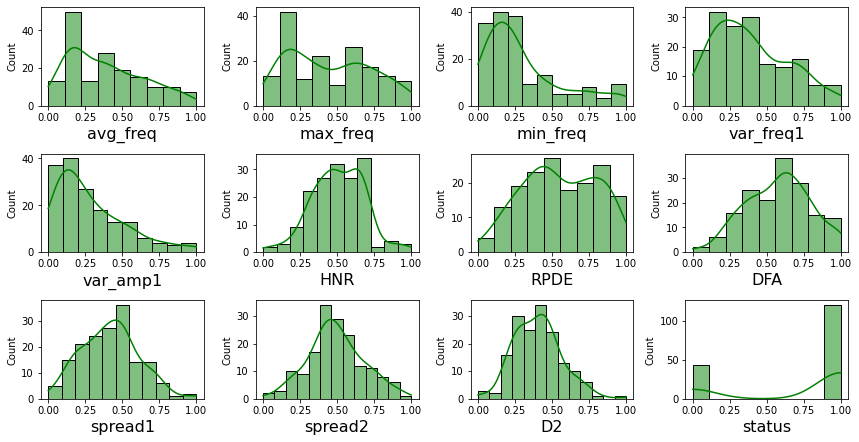

In [28]:
dist_plot(dataset)

In [29]:
dataset.skew().sort_values(ascending=False)

min_freq     1.236476
var_amp1     1.151574
avg_freq     0.578739
var_freq1    0.557216
D2           0.477432
spread1      0.290946
max_freq     0.271053
spread2      0.147347
HNR         -0.080312
RPDE        -0.083814
DFA         -0.132529
status      -1.064996
dtype: float64

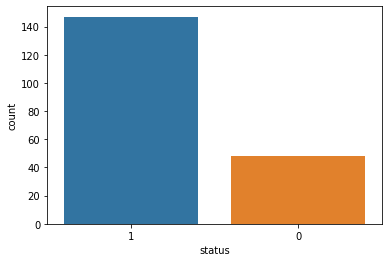

In [30]:
#Visualizing the target column "status"
sns.countplot(x = 'status',
              data = data,
              order = data['status'].value_counts().index)

## <u> Creating baseline & GridSearch

##### Splitting the dataset

In [31]:
y = dataset['status']
X = dataset.drop(['status'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=45)

# Neural Network 

In [33]:
import tensorflow as tf
from tensorflow import keras
#tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
  ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5/5 [==============================] - 4s 6ms/step - loss: 1.1602 - accuracy: 0.7273 - precision: 0.8077 - recall: 0.8400
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5567 - accuracy: 0.7576 - precision: 0.7576 - recall: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4345 - accuracy: 0.8409 - precision: 0.8264 - recall: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5156 - accuracy: 0.7500 - precision: 0.8526 - recall: 0.8100
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4517 - accuracy: 0.8182 - precision: 0.8065 - recall: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3743 - accuracy: 0.8333 - precision: 0.8482 - recall: 0.9500
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.8333 - precision: 0.8482 - recall: 0.9500
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3

In [34]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

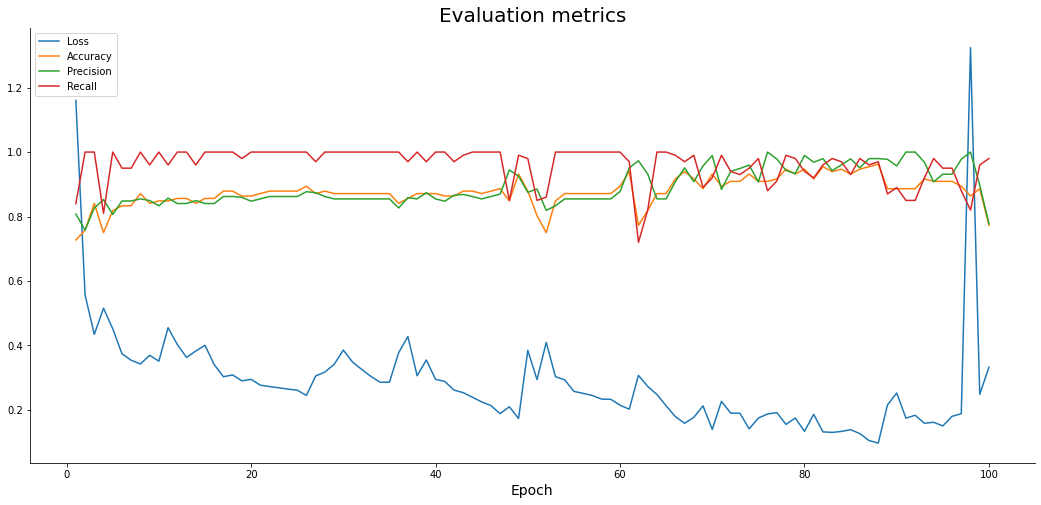

In [35]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [36]:
predictions = model.predict(X_test)

In [37]:
prediction_classes = [
    1 if prob > 0.8 else 0 for prob in np.ravel(predictions)
]

In [38]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[ 7  5]
 [ 1 20]]


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')
print(f'F1 score: {f1_score(y_test, prediction_classes):.2f}')

Accuracy: 0.82
Precision: 0.80
Recall: 0.95
F1 score: 0.87


In [40]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# later...


Saved model to disk


In [41]:
y.shape

(165,)

In [42]:
X.shape
y.shape


(165,)

In [43]:
model.save('/content/saved')

In [44]:
model.predict([[0.360507, 0.308494, 0.056841, 0.096502, 0.030660,0.704830,0.094073,0.590437,0.215782,0.193885,0.258364]])

array([[0.88626844]], dtype=float32)

In [45]:
model.save('/content/predtest.h5')

In [46]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 8.7 MB/s 
     |████████████████████████████████| 180 kB 68.1 MB/s 
     |████████████████████████████████| 40 kB 7.6 MB/s 
     |████████████████████████████████| 145 kB 69.5 MB/s 
     |████████████████████████████████| 217 kB 67.4 MB/s 
     |████████████████████████████████| 51 kB 8.9 MB/s 
     |████████████████████████████████| 85 kB 5.5 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [47]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2022-09-27 19:53:33--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.200.128, 2404:6800:4003:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.200.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.09s   

2022-09-27 19:53:34 (224 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [48]:
!tar -zxvf /content/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [49]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [50]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("/content/saved") # path to the SavedModel directory
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [51]:

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/model.tflite")
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.allocate_tensors()

# input details
print(input_details)

# output details
print(output_details)

[{'name': 'serving_default_dense_input:0', 'index': 0, 'shape': array([ 1, 11], dtype=int32), 'shape_signature': array([-1, 11], dtype=int32), 'dtype': <class 'numpy.float64'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 14, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [52]:
X


,avg_freq,max_freq,min_freq,var_freq1,var_amp1,HNR,RPDE,DFA,spread1,spread2,D2
0,0.184308,0.324329,0.054815,0.743064,0.592413,0.436042,0.369155,0.960987,0.625933,0.607889,0.390661
1,0.198327,0.273454,0.278323,0.965018,0.897280,0.344599,0.470830,0.977878,0.772458,0.769336,0.473145
2,0.165004,0.210073,0.264200,1.000000,0.786073,0.417782,0.416255,0.976737,0.764056,0.765965,0.436977
3,0.187568,0.170623,0.278139,0.965018,0.649056,0.452237,0.370978,1.000000,0.739160,0.684115,0.339999
4,0.185909,0.206386,0.284086,0.199035,0.113286,0.616908,0.792079,0.756937,0.462837,0.587331,0.191959
...,...,...,...,...,...,...,...,...,...,...,...
160,0.152702,0.100091,0.121887,0.191797,0.040014,0.611698,0.697028,0.338335,0.249179,0.335053,0.218297
161,0.660416,0.944121,0.073416,0.634499,0.280617,0.357884,0.587775,0.436542,0.204645,0.358872,0.397292
162,0.499820,0.757552,0.165722,0.351025,0.542699,0.364878,0.447684,0.333418,0.283262,0.270243,0.549049
163,0.705488,0.887143,0.138243,0.477684,0.311277,0.347510,0.408567,0.434480,0.351429,0.287416,0.605474


In [53]:
!zip -r /content/sample_data.zip /content/saved

  adding: content/saved/ (stored 0%)
  adding: content/saved/assets/ (stored 0%)
  adding: content/saved/keras_metadata.pb (deflated 88%)
  adding: content/saved/variables/ (stored 0%)
  adding: content/saved/variables/variables.data-00000-of-00001 (deflated 19%)
  adding: content/saved/variables/variables.index (deflated 66%)
  adding: content/saved/saved_model.pb (deflated 88%)


In [54]:
fash=tf.keras.models.load_model('/content/saved')

In [55]:
import pickle

In [56]:
pickle.dump(model,open('/content/mooodel','wb'))

In [57]:
wodel =pickle.load(open('/content/mooodel','rb'))

In [58]:
a= [0.184308, 0.324329, 0.054815, 0.743064, 0.592413,0.436042,0.369155,0.960987,0.625933,0.607889,0.390661]

In [59]:
sm=wodel.predict([a])

In [65]:
sm

array([[0.9999999]], dtype=float32)

array([[0.9999999]], dtype=float32)

array([[0.184308, 0.324329, 0.054815, 0.743064, 0.592413, 0.436042,
        0.369155, 0.960987, 0.625933, 0.607889, 0.390661]])

ValueError: ignored